Here we have a Personality dataset. Will perform K-means Clustering on it.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv(r"C:\Rig\Pandora's BOX\ML ig\Datasets\personality_dataset.csv")

In [17]:
df.shape

(5000, 8)

In [18]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [19]:
df = df.drop(columns=['Personality'])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3,Yes,6,7,No,14,5
1,2,No,8,6,No,7,8
2,1,No,9,4,No,9,3
3,8,No,0,0,Yes,9,3
4,5,Yes,3,0,No,2,6


In [20]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

In [27]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,4.969000,4.995200,3.523400,7.253200,4.759800
std,3.033922,2.862449,2.088618,4.045783,2.780369
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,5.000000,3.000000
50%,5.000000,5.000000,4.000000,7.000000,5.000000
75%,7.000000,7.000000,5.000000,10.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [29]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1,'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1,'No': 0})

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

### PCA

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [77]:
from sklearn.cluster import KMeans

### Manual method

In [80]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

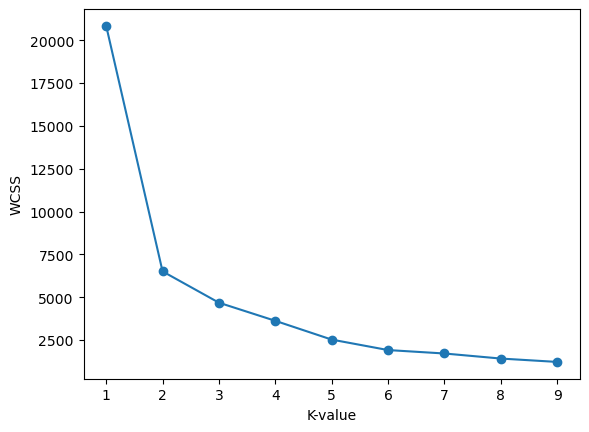

In [81]:
plt.plot(range(1,10), wcss, marker='o')
plt.xticks(range(1,10))
plt.xlabel('K-value')
plt.ylabel('WCSS')

In [84]:
kmeans = KMeans(n_clusters=2,init='k-means++', random_state=42)
kmeans.fit(X_pca)
pred = kmeans.fit_predict(X_pca)    # ---> This is it. U can plot it if u want. Imma plot this in the end

### Automatic method using the kneed library

In [43]:
!pip install kneed

In [86]:
from kneed import KneeLocator

kl = KneeLocator(range(1,10), wcss, curve='convex', direction = 'decreasing')
kl.elbow

2

In [88]:
from sklearn.metrics import silhouette_score

sil_score = []
for i in range(2,10):                           # Use value of i >=2, or error pops up
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    ypred = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, ypred)
    sil_score.append(score)

Text(0, 0.5, 'Silhouette Score')

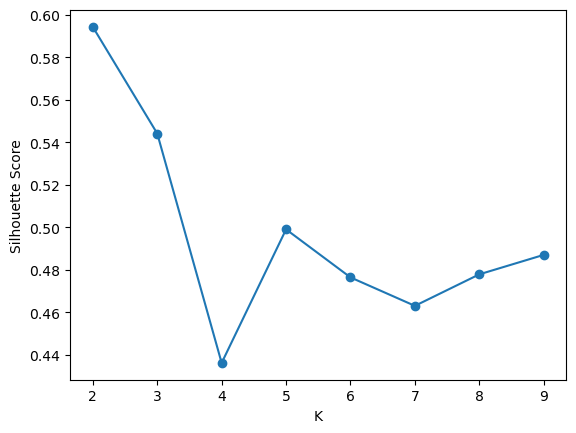

In [89]:
plt.plot(range(2,10), sil_score, marker='o')
plt.xlabel('K')
plt.xticks(range(2,10))
plt.ylabel('Silhouette Score')

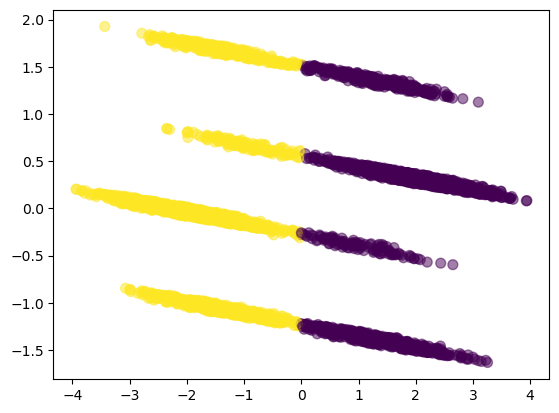

In [90]:
plt.scatter(X_pca[:,0], X_pca[:,1],c=pred,s=50,alpha=0.5)

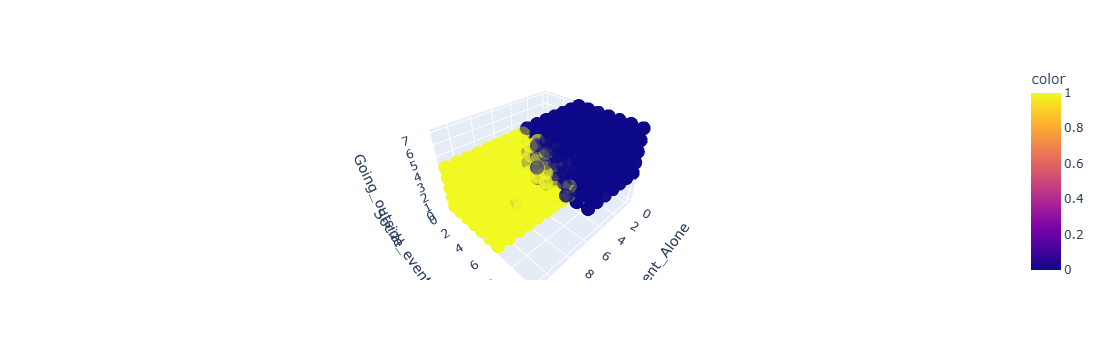

In [91]:
import plotly.express as px

fig = px.scatter_3d(df, x='Time_spent_Alone', y='Social_event_attendance', z='Going_outside', color=pred, opacity=0.5)
fig.show()

The clustering of Introvert and Extrovert people has been done, as above